In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Context
The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship is contested every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. It is one of the most prestigious and important trophies in the sport of football.


# Data Dictionary
The World Cups dataset has the following information about all the World Cups in history till 2014.

**Year:** Year in which the world cup was held

**Host:** Country where the world cup was held

**Champion:** Team that won the world cup

**Runner Up:** Team that came second

**Third Place:** Team that came third

**Teams:** Number of teams that qualified for the world cup

**Matches Played:** Total matches played in the world cup

**Goals Scored:** Total goals scored in the world cup

**Avg Goals Per Game:** Average of goals scored per game

#1. Importing the required libraries for EDA

In [21]:
# Import the necessary libraries

import numpy as np
import pandas as pd

import seaborn as sns             #visualisation
import matplotlib.pyplot as plt   #visualisation
%matplotlib inline

## 2. Loading the data into the data frame.


In [22]:
# Loading the dataset

df = pd.read_csv("/content/drive/MyDrive/Datasets/FIFA - World Cup Database/FIFA - World Cup Summary.csv")

# To display the top 5 rows

df.head(5)

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [23]:
df.tail(5)    # To display the bottom 5 rows

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
17,2006,Germany,Italy,France,Germany,32,64,147,2.3
18,2010,South Africa,Spain,Netherlands,Germany,32,64,145,2.3
19,2014,Brazil,Germany,Argentina,Netherlands,32,64,171,2.7
20,2018,Russia,France,Croatia,Belgium,32,64,169,2.6
21,2022,Qatar,Argentina,France,Croatia,32,64,172,2.7


In [24]:
df.shape    # To display the dimension of the dataset

df.size     # To display the size, or total number of elements in the dataframe

198

# 3. Checking the types of data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                22 non-null     int64  
 1   HOST                22 non-null     object 
 2   CHAMPION            22 non-null     object 
 3   RUNNER UP           22 non-null     object 
 4   THIRD PLACE         22 non-null     object 
 5   TEAMS               22 non-null     int64  
 6   MATCHES PLAYED      22 non-null     int64  
 7   GOALS SCORED        22 non-null     int64  
 8   AVG GOALS PER GAME  22 non-null     float64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.7+ KB


* There are two different data types - int64 (represents numerical variables) and object (represents categorical variables)
* There are 5 numerical columns - Year, Teams, MatchesPlayed, Goals Scored, Avg Goals Per Game
* The rest of the columns are categorical








# 4. Checking Missing Values

In [26]:
df.isnull().values.any()

False

The output of the above code (False) implies that **there are no missing values in the data.**

# 5. Summary Statistics

In [27]:
df.describe()

,YEAR,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1978.909091,22.227273,43.727273,123.636364,3.059091
std,27.738419,7.602830,17.776876,34.841882,0.831327
min,1930.000000,13.000000,16.000000,70.000000,2.200000
25%,1959.000000,16.000000,32.000000,90.500000,2.600000
50%,1980.000000,20.000000,45.000000,129.000000,2.700000
75%,2001.000000,32.000000,64.000000,146.750000,3.450000
max,2022.000000,32.000000,64.000000,172.000000,5.400000


* The minimum and the maximum number of goals scored in world cups from 1930-2014 are 70 and 172, respectively.
* The average number of goals scored in a world cup is ~123.
* The number of qualified teams and matches played has increased over the years which implies that the world cups are getting bigger which in turn implies that the popularity of the sport is increasing over the years.

# 6. Winners

In [28]:
df['CHAMPION'].value_counts()   # returns object containing counts of unique values

CHAMPION
Brazil          5
Italy           4
West Germany    3
Argentina       3
Uruguay         2
France          2
England         1
Spain           1
Germany         1
Name: count, dtype: int64

<ipython-input-29-30f4a1f5a19a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAMPION', data=df, palette='Set1')


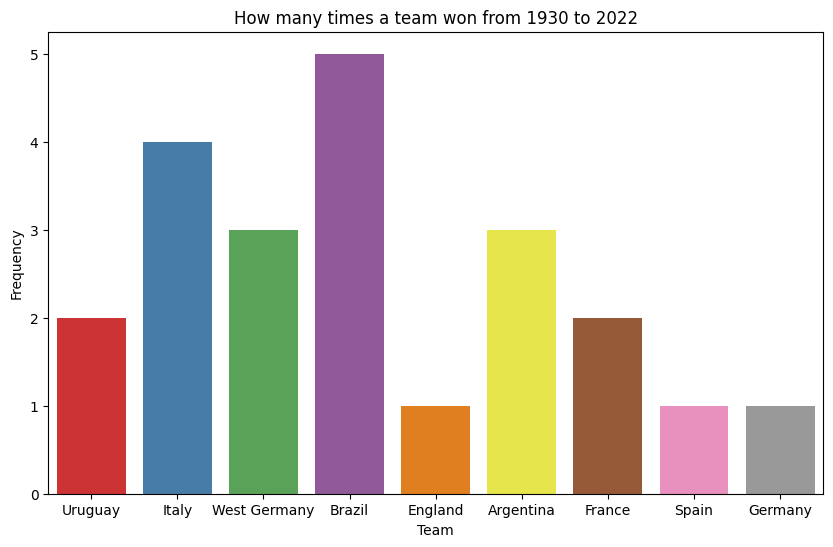

In [29]:
# Bar chart with frequency of winners
plt.figure(figsize=(10,6))
sns.countplot(x='CHAMPION', data=df, palette='Set1')
plt.title('How many times a team won from 1930 to 2022')
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.show()

* **Brazil** has won the World Cup the most number of times (5).
* If we count **West Germany** and **Germany** as the same, they have won 4 times.
* Only 8 teams have won the World Cup

# 7. A Look at the Number of Teams

In [30]:
m1 = df['TEAMS'].mean()
print(m1)
m2 = df['TEAMS'].median()
print(m2)
m3 = df['TEAMS'].mode()[0]
print(m3)

22.227272727272727
20.0
16


* The mean, median, and mode of the variable TEAMS are 22.23, 20, and 16, respectively.
* The mean is greater than the median which implies that the distribution of TEAMS might be skewed to the right.

In [31]:
df[df['TEAMS']>m1]['YEAR']  # Years where number of teams were bigger than the average m1

11    1982
12    1986
13    1990
14    1994
15    1998
16    2002
17    2006
18    2010
19    2014
20    2018
21    2022
Name: YEAR, dtype: int64

* Since 1982 the number of teams is greater than the average 22.23

# 8. Goal Scoring Trends

## 8.1 Goals per Match


In [32]:
GS_median = np.median(df['GOALS SCORED'])
print(GS_median)
MP_median = np.median(df['MATCHES PLAYED'])
print(MP_median)

129.0
45.0


* The median number of goals scored and matches played are 129 and 45, respectively.

In [33]:
df[df['GOALS SCORED'] == df['GOALS SCORED'].min()][['YEAR','HOST','GOALS SCORED']]

,YEAR,HOST,GOALS SCORED
0,1930,Uruguay,70
1,1934,Italy,70


* There is a tie for the minimum number of goals scored. 1930 and 1934 both had the minimum number of goals in a edition.

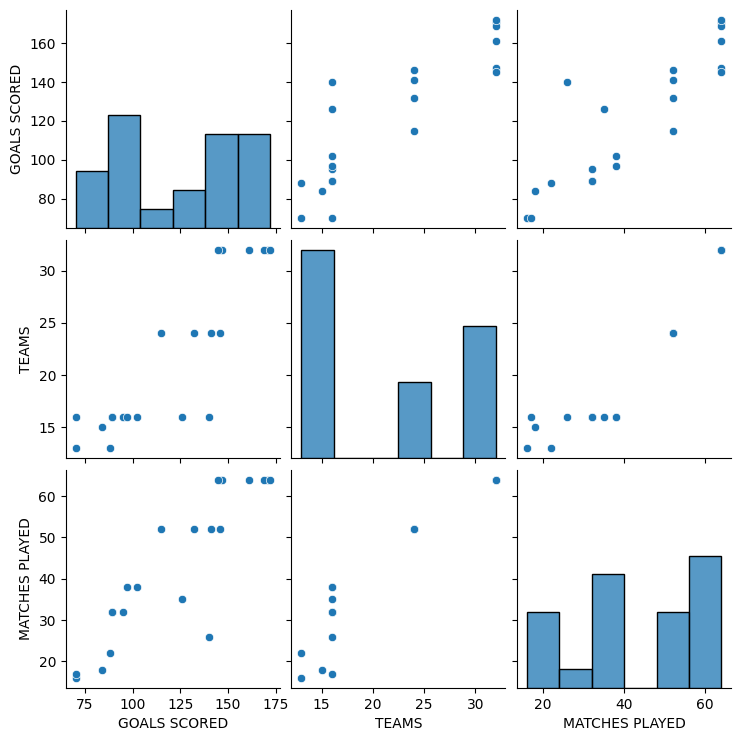

In [34]:
sns.pairplot(df[['GOALS SCORED', 'TEAMS', 'MATCHES PLAYED']])   # Plot the pairplots of 'GOALS SCORED', 'TEAMS', 'MATCHES PLAYED'
plt.show()

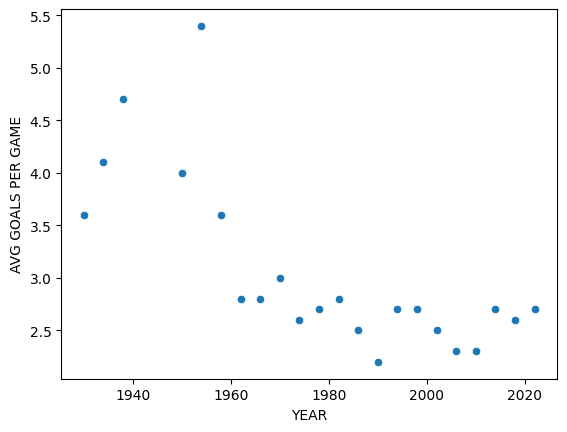

In [35]:
sns.scatterplot(x='YEAR', y='AVG GOALS PER GAME', data=df)
plt.show()

* The average number of goals per match has significantly decreased since its peak in 1954 and appears to have stabilized since 1962.


## 8.2 Goals Box-plot

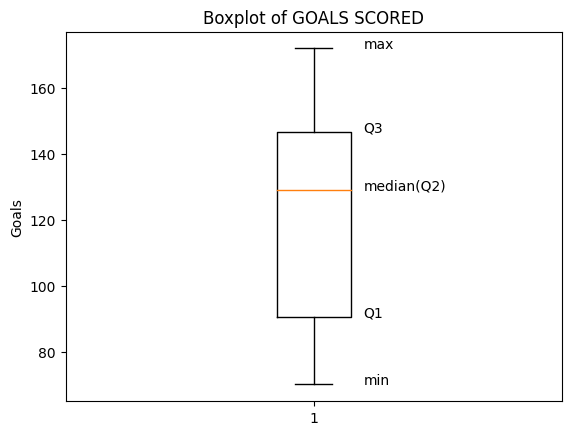

In [36]:
# Creating the plot

plt.boxplot(df['GOALS SCORED'])

plt.text(x=1.1, y=df['GOALS SCORED'].min(), s='min')
plt.text(x=1.1, y=df['GOALS SCORED'].quantile(0.25), s='Q1')
plt.text(x=1.1, y=df['GOALS SCORED'].median(), s='median(Q2)')
plt.text(x=1.1, y=df['GOALS SCORED'].quantile(0.75), s='Q3')
plt.text(x=1.1, y=df['GOALS SCORED'].max(), s='max')

plt.title('Boxplot of GOALS SCORED')
plt.ylabel('Goals')
plt.show()


In [39]:
# Calculate the 25th and 75th quantiles
Q1 = df['GOALS SCORED'].quantile(0.25)
Q3 = df['GOALS SCORED'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

print(IQR)


56.25


* The boxplot shows that there are no outliers for the number of goals scored.
* The IQR for the number of goals scored is high which implies that there is variability in the number of goals scored in world cups which can be expected.